# Practica 2.1
## Juan Latasa, David Arranz, Jesus tejada y Marcos Rodríguez
## Perceptron

In [17]:
#declaración de librerías
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(245) #declaramos una semilla para que nos de los mismo resultados

Aqui lo que hace es crear un DataFrame, para posteriormente representar la tabla que se nos pide.

Ponemos las columnas correspondientes.

In [18]:
#creamos un dataframe, para posteriormente mostrar la tabla que se nos pide
df = pd.DataFrame(columns=['Epoch', 'Entradas',"Pesos iniciales",'Desired Output Yr',"Actual output Yd","Error","Pesos finales"])
df

,Epoch,Entradas,Pesos iniciales,Desired Output Yr,Actual output Yd,Error,Pesos finales


In [19]:
learn_rate=0.1 #declaramoa el learning rate
Umbral=1 #declaramos el umbral

In [20]:
pesos=2 * np.random.random((2,1)) - 1 #inicilaizamos los pesos, los cuales van a ir de -1 a 1
Inipesos=pesos #guardamos los pesos iniciales
pesos

array([[ 0.81370773],
       [-0.77493999]])

### Función de activación

In [21]:
def funcionActivacion(S,Umbral):
    if S>=Umbral: # si el sumatorio es >= que el umbral devuelve 1, si no 0
        return 1
    else:
        return 0

### Representación ecuación general

In [22]:
def pintamos(i,Func): #aqui representaremos la ecuacion general tran finalizar cada epoch
    if Func: #si es la funcion and ...
        plt.plot([0,0,1],[0,1,0],'o', color='blue');
        plt.plot([1],[1],'o', color='red');
    else: # si es la función xor
        plt.plot([0,1],[1,0],'o', color='red');
        plt.plot([0,1],[0,1],'o', color='blue');        
    pendiente=0
    OrdenadaOrigen=0
    if pesos[1]!=0: #para no dividir entre 0
        pendiente=-(pesos[0]/pesos[1])  #calculamos la pendiente
        OrdenadaOrigen=Umbral/pesos[1]  # calculamos la ordenada en el origen
    
    plt.plot([-2,2],[pendiente*-2 + OrdenadaOrigen,pendiente*2 + OrdenadaOrigen], color='green') #pintamos la recta, de -2 a 2
    axes = plt.gca()
    axes.set_xlim([-0.1,1.1]) #ponemos el tamaño que tendra, es decir en x, se vera desde el -0.1, al 1.1
    axes.set_ylim([-0.1,1.1])
    plt.title("Epoch: " +str (i+1))
    plt.show()
    print("Ecuación del hiperplano: {:.2f}*x + {:.2f}".format(pendiente[0],OrdenadaOrigen[0])) #imprimimos la ecuación

### Entrenamiento Red Neuronal

In [23]:
#aqui entrenamos nuestro perceptrón
def entrenar(entradas,salidas,epoch,FAnd):
    global pesos #ponemos esto para que coja la variable de pesos global y la podamos modificar
    ErroresEpoch=[] #aqui guardaremos el error de cada epoch, para mostrarlo posteriormente en una gráfica
    for i in range(epoch):
        errorM=0.0
        for x in range(entradas.shape[0]): #recorremos los elementos del array
            S=np.dot(entradas[x],pesos) #hacemos el sumatorio
            y=funcionActivacion(S[0],Umbral)#aplicacmos la funcion de activación
            error=salidas[x]-y #calculamos el error
            errorM+=abs(error[0]) #guardamos el error en valor absoluto y lo sumamos
            pesosI=pesos.copy() #guardamos los pesos anteriores, para la tabla que mostraremos posteriormente
            pesos=pesos+np.array([learn_rate*entradas[x]*error]).T #actualizamos los pesos
            df.loc[df.shape[0]]=i+1,str(entradas[x]),np.round(pesosI,decimals=4),salidas[x][0],y,error[0],np.round(pesos.copy(),decimals=4)

        errorM/=entradas.shape[0]#sacamos el eror medio
        ErroresEpoch.append(errorM) #lo guardamos
        pintamos(i,FAnd)#pintamos la recta  
        if errorM==0: # si el error es 0, entonces ya ha acabado
            return i,ErroresEpoch #devolvemos en que epoch y que errores ha tenido al finalizar
    return i,ErroresEpoch


### Clasificación

In [24]:
def clasificacion(entradas): #aqui podremos hacer la clasificación, es decir comprobaremos los resultados que nos da la red
    S=np.dot(entradas,pesos) #una vez ya entrenada
    print(funcionActivacion(S[0],Umbral))

### Función AND

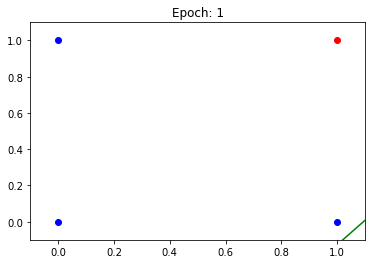

Ecuación del hiperplano: 1.35*x + -1.48


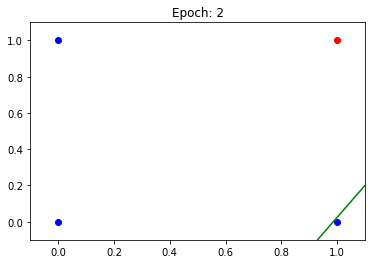

Ecuación del hiperplano: 1.76*x + -1.74


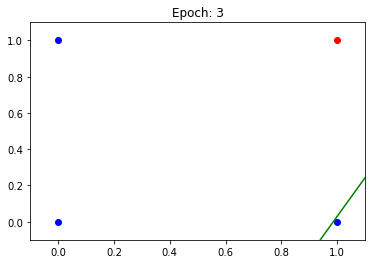

Ecuación del hiperplano: 2.13*x + -2.11


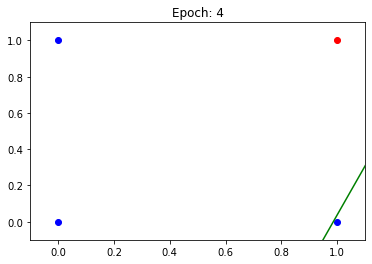

Ecuación del hiperplano: 2.70*x + -2.67


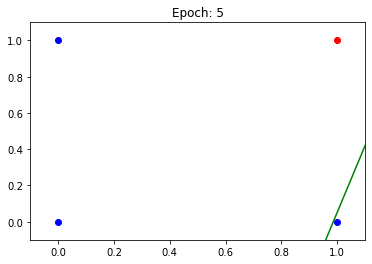

Ecuación del hiperplano: 3.69*x + -3.64


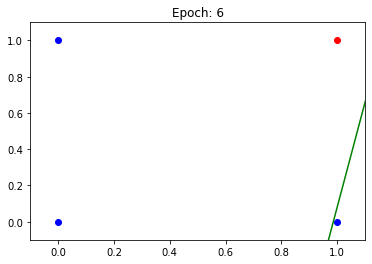

Ecuación del hiperplano: 5.79*x + -5.72


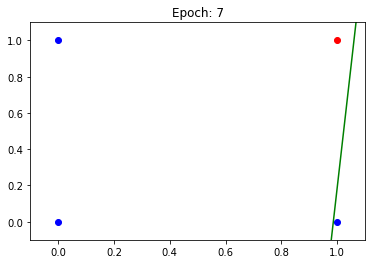

Ecuación del hiperplano: 13.53*x + -13.34


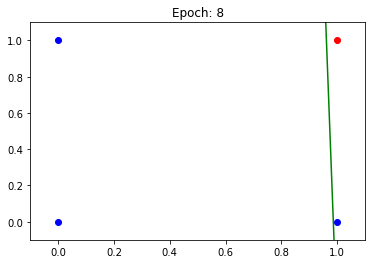

Ecuación del hiperplano: -40.45*x + 39.90


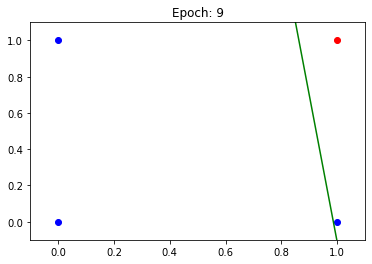

Ecuación del hiperplano: -8.11*x + 8.00


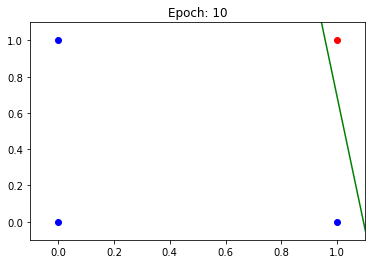

Ecuación del hiperplano: -7.31*x + 8.00


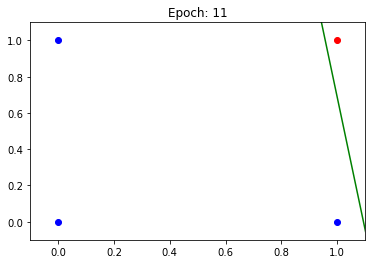

Ecuación del hiperplano: -7.31*x + 8.00


array([[0.91370773],
       [0.12506001]])

In [25]:
entradas=np.array([[0,0],[0,1],[1,0],[1,1]])
salidas=np.array([[0],[0],[0],[1]])

#las epochs
periodo=30
#si ve que el error es 0 antes de llegar al numero de epochs, saldra y nos devolvera en que epoch donde ha conseguido el error 0
EpochNecesarios,ErroresEpoch=entrenar(entradas,salidas,periodo,True)
pesos


In [26]:
df2=df.set_index(["Epoch","Entradas"]) 
df2 #imprimimos la tabla

Pesos iniciales Desired Output Yr Actual output Yd  \
Epoch Entradas                                                             
1     [0 0]     [[0.8137], [-0.7749]]                 0                0   
      [0 1]     [[0.8137], [-0.7749]]                 0                0   
      [1 0]     [[0.8137], [-0.7749]]                 0                0   
      [1 1]     [[0.8137], [-0.7749]]                 1                0   
2     [0 0]     [[0.9137], [-0.6749]]                 0                0   
      [0 1]     [[0.9137], [-0.6749]]                 0                0   
      [1 0]     [[0.9137], [-0.6749]]                 0                0   
      [1 1]     [[0.9137], [-0.6749]]                 1                0   
3     [0 0]     [[1.0137], [-0.5749]]                 0                0   
      [0 1]     [[1.0137], [-0.5749]]                 0                0   
      [1 0]     [[1.0137], [-0.5749]]                 0                1   
      [1 1]     [[0.9137], [-0.5749]]                 1                0   
4     [0 0]     [[1.0137], [-0.4749]]                 0                0   
      [0 1]     [[1.0137], [-0.4749]]                 0                0   
      [1 0]     [[1.0137], [-0.4749]]                 0                1   
      [1 1]     [[0.9137], [-0.4749]]                 1                0   
5     [0 0]     [[1.0137], [-0.3749]]                 0                0   
      [0 1]     [[1.0137], [-0.3749]]                 0                0   
      [1 0]     [[1.0137], [-0.3749]]                 0                1   
      [1 1]     [[0.9137], [-0.3749]]                 1                0   
6     [0 0]     [[1.0137], [-0.2749]]                 0                0   
      [0 1]     [[1.0137], [-0.2749]]                 0                0   
      [1 0]     [[1.0137], [-0.2749]]                 0                1   
      [1 1]     [[0.9137], [-0.2749]]                 1                0   
7     [0 0]     [[1.0137], [-0.1749]]                 0                0   
      [0 1]     [[1.0137], [-0.1749]]                 0                0   
      [1 0]     [[1.0137], [-0.1749]]                 0                1   
      [1 1]     [[0.9137], [-0.1749]]                 1                0   
8     [0 0]     [[1.0137], [-0.0749]]                 0                0   
      [0 1]     [[1.0137], [-0.0749]]                 0                0   
      [1 0]     [[1.0137], [-0.0749]]                 0                1   
      [1 1]     [[0.9137], [-0.0749]]                 1                0   
9     [0 0]      [[1.0137], [0.0251]]                 0                0   
      [0 1]      [[1.0137], [0.0251]]                 0                0   
      [1 0]      [[1.0137], [0.0251]]                 0                1   
      [1 1]      [[0.9137], [0.0251]]                 1                0   
10    [0 0]      [[1.0137], [0.1251]]                 0                0   
      [0 1]      [[1.0137], [0.1251]]                 0                0   
      [1 0]      [[1.0137], [0.1251]]                 0                1   
      [1 1]      [[0.9137], [0.1251]]                 1                1   
11    [0 0]      [[0.9137], [0.1251]]                 0                0   
      [0 1]      [[0.9137], [0.1251]]                 0                0   
      [1 0]      [[0.9137], [0.1251]]                 0                0   
      [1 1]      [[0.9137], [0.1251]]                 1                1   

               Error          Pesos finales  
Epoch Entradas                               
1     [0 0]        0  [[0.8137], [-0.7749]]  
      [0 1]        0  [[0.8137], [-0.7749]]  
      [1 0]        0  [[0.8137], [-0.7749]]  
      [1 1]        1  [[0.9137], [-0.6749]]  
2     [0 0]        0  [[0.9137], [-0.6749]]  
      [0 1]        0  [[0.9137], [-0.6749]]  
      [1 0]        0  [[0.9137], [-0.6749]]  
      [1 1]        1  [[1.0137], [-0.5749]]  
3     [0 0]        0  [[1.0137], [-0.5749]]  
      [0 1]        

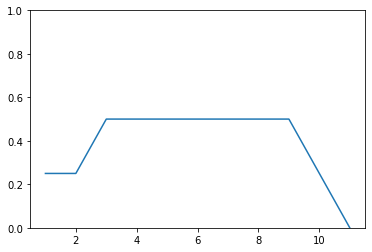

In [27]:
plt.plot(np.arange(EpochNecesarios+1)+1,ErroresEpoch) #mostramos los erres que ha tenido en cada epoch
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [28]:
#comprobamos que son los resultados correctos
clasificacion(np.array([0,0]))
clasificacion(np.array([0,1]))
clasificacion(np.array([1,0]))
clasificacion(np.array([1,1]))

0
0
0
1


### Funcion XOR

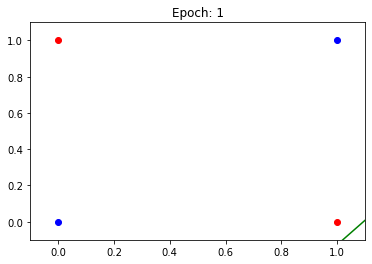

Ecuación del hiperplano: 1.35*x + -1.48


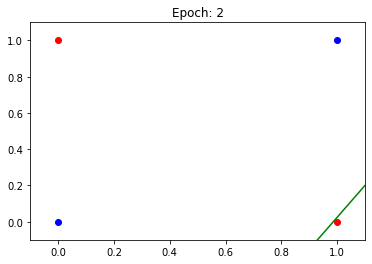

Ecuación del hiperplano: 1.76*x + -1.74


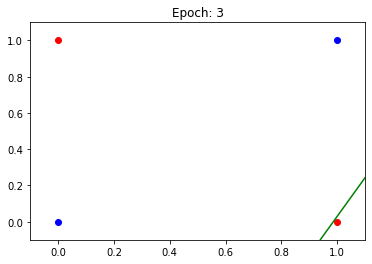

Ecuación del hiperplano: 2.13*x + -2.11


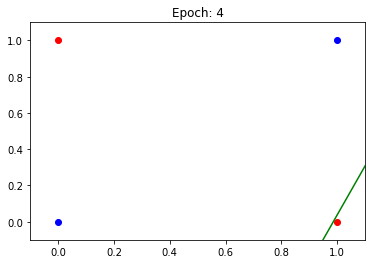

Ecuación del hiperplano: 2.70*x + -2.67


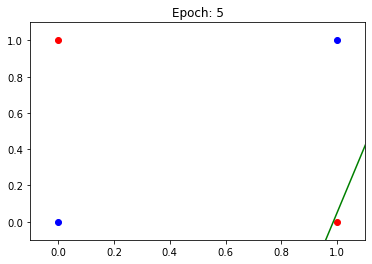

Ecuación del hiperplano: 3.69*x + -3.64


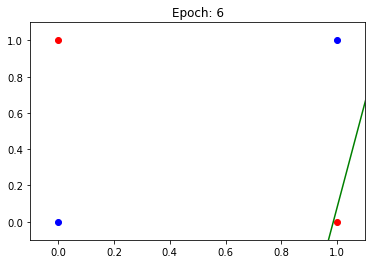

Ecuación del hiperplano: 5.79*x + -5.72


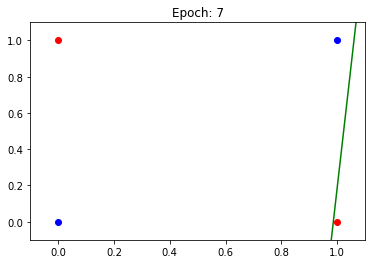

Ecuación del hiperplano: 13.53*x + -13.34


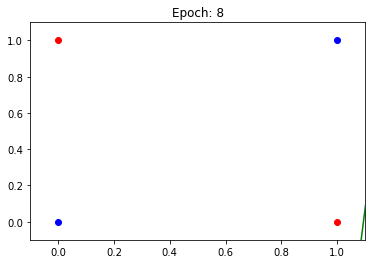

Ecuación del hiperplano: 12.19*x + -13.34


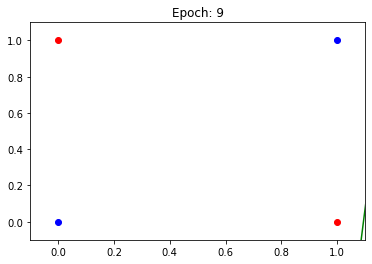

Ecuación del hiperplano: 12.19*x + -13.34


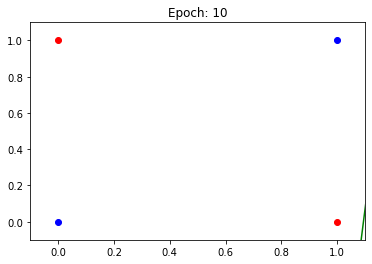

Ecuación del hiperplano: 12.19*x + -13.34


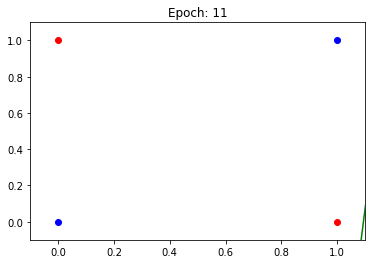

Ecuación del hiperplano: 12.19*x + -13.34


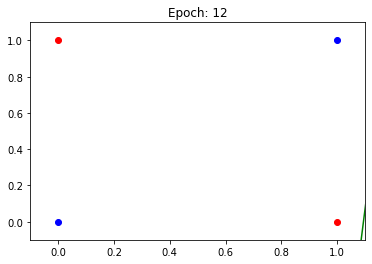

Ecuación del hiperplano: 12.19*x + -13.34


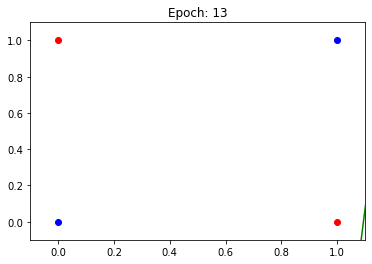

Ecuación del hiperplano: 12.19*x + -13.34


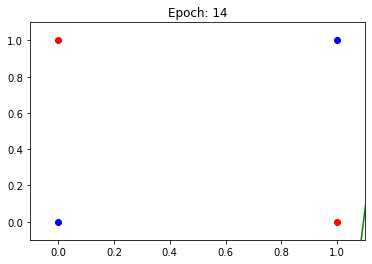

Ecuación del hiperplano: 12.19*x + -13.34


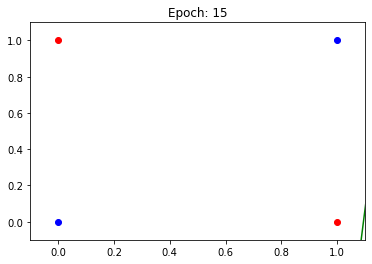

Ecuación del hiperplano: 12.19*x + -13.34


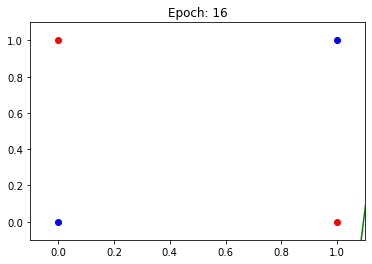

Ecuación del hiperplano: 12.19*x + -13.34


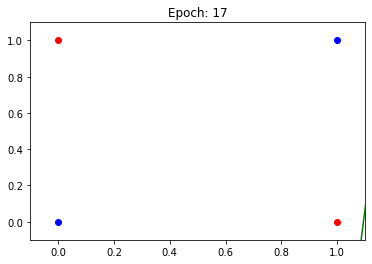

Ecuación del hiperplano: 12.19*x + -13.34


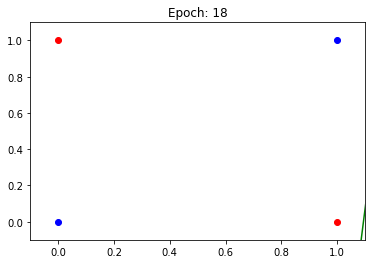

Ecuación del hiperplano: 12.19*x + -13.34


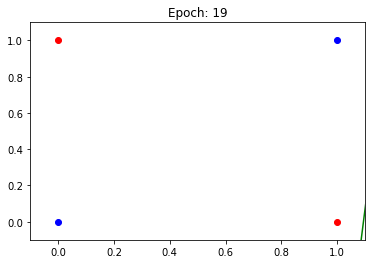

Ecuación del hiperplano: 12.19*x + -13.34


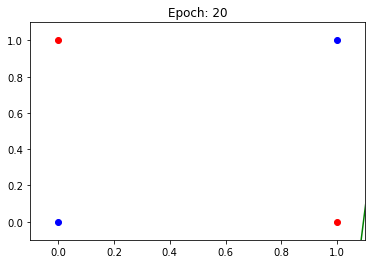

Ecuación del hiperplano: 12.19*x + -13.34


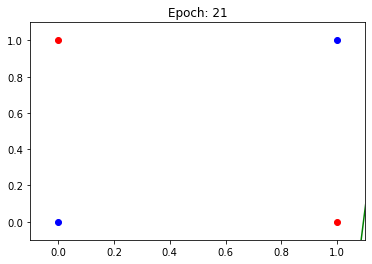

Ecuación del hiperplano: 12.19*x + -13.34


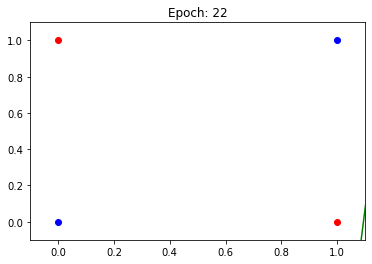

Ecuación del hiperplano: 12.19*x + -13.34


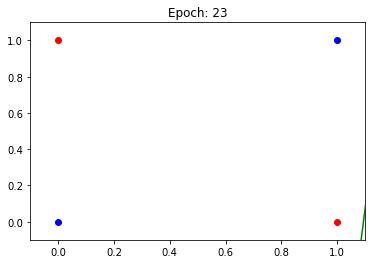

Ecuación del hiperplano: 12.19*x + -13.34


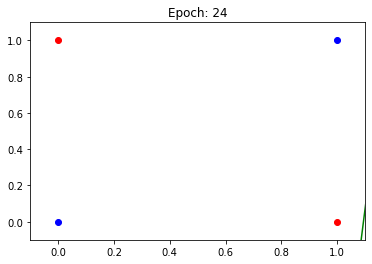

Ecuación del hiperplano: 12.19*x + -13.34


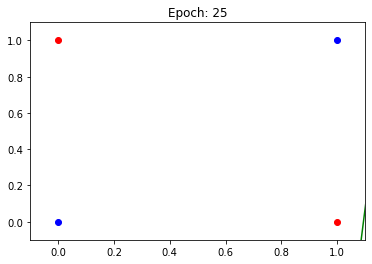

Ecuación del hiperplano: 12.19*x + -13.34


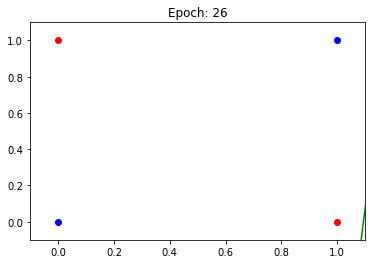

Ecuación del hiperplano: 12.19*x + -13.34


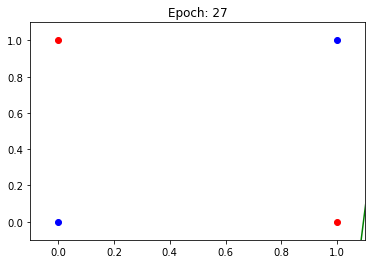

Ecuación del hiperplano: 12.19*x + -13.34


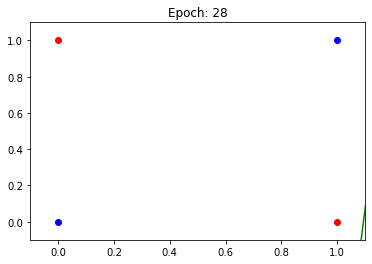

Ecuación del hiperplano: 12.19*x + -13.34


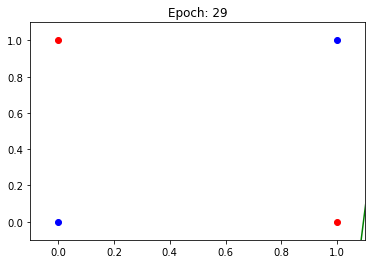

Ecuación del hiperplano: 12.19*x + -13.34


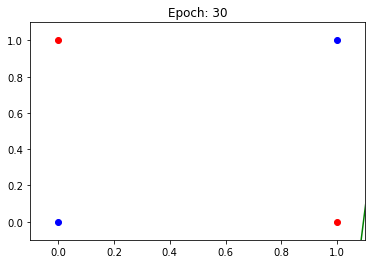

Ecuación del hiperplano: 12.19*x + -13.34


array([[ 0.91370773],
       [-0.07493999]])

In [29]:
pesos=Inipesos #restablecemos los pesos, para tener los generados aleatorimante antes.
df.drop(df.index, inplace=True) #eliminamos la tabla anterior
#XOR
entradas=np.array([[0,0],[0,1],[1,0],[1,1]])
salidas=np.array([[0],[1],[1],[0]])

#las epochs
periodo=30
#si ve que el error es 0 antes de llegar al numero de epochs, saldra y nos devolvera en que epoch donde ha conseguido el error 0

EpochNecesariosXOR,ErroresEpochXOR=entrenar(entradas,salidas,periodo,False) #ponemos False para indicar que es XOR
pesos

In [30]:
df2=df.set_index(["Epoch","Entradas"])
df2#imprimimos la tabla

Pesos iniciales Desired Output Yr Actual output Yd  \
Epoch Entradas                                                             
1     [0 0]     [[0.8137], [-0.7749]]                 0                0   
      [0 1]     [[0.8137], [-0.7749]]                 1                0   
      [1 0]     [[0.8137], [-0.6749]]                 1                0   
      [1 1]     [[0.9137], [-0.6749]]                 0                0   
2     [0 0]     [[0.9137], [-0.6749]]                 0                0   
...                               ...               ...              ...   
29    [1 1]      [[1.0137], [0.0251]]                 0                1   
30    [0 0]     [[0.9137], [-0.0749]]                 0                0   
      [0 1]     [[0.9137], [-0.0749]]                 1                0   
      [1 0]      [[0.9137], [0.0251]]                 1                0   
      [1 1]      [[1.0137], [0.0251]]                 0                1   

               Error          Pesos finales  
Epoch Entradas                               
1     [0 0]        0  [[0.8137], [-0.7749]]  
      [0 1]        1  [[0.8137], [-0.6749]]  
      [1 0]        1  [[0.9137], [-0.6749]]  
      [1 1]        0  [[0.9137], [-0.6749]]  
2     [0 0]        0  [[0.9137], [-0.6749]]  
...              ...                    ...  
29    [1 1]       -1  [[0.9137], [-0.0749]]  
30    [0 0]        0  [[0.9137], [-0.0749]]  
      [0 1]        1   [[0.9137], [0.0251]]  
      [1 0]        1   [[1.0137], [0.0251]]  
      [1 1]       -1  [[0.9137], [-0.0749]]  

[120 rows x 5 columns]

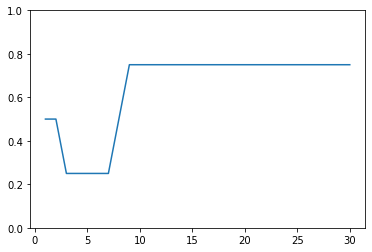

In [31]:
plt.plot(np.arange(EpochNecesariosXOR+1)+1,ErroresEpochXOR)#mostramos los erres que ha tenido en cada epoch
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [32]:
#comprobamos los resultados para XOR
clasificacion(np.array([0,0]))
clasificacion(np.array([0,1]))
clasificacion(np.array([1,0]))
clasificacion(np.array([1,1]))
#vemos que no son correctos

0
0
0
0


Podemos ver que el XOR no es capaz de resolverlo, esto se debe a que es un problema no lineal.